In [1]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

from JPAS_DA import global_setup
from JPAS_DA.data import loading_tools
from JPAS_DA.data import cleaning_tools

import numpy as np

from JPAS_DA.utils import plotting_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

In [2]:
root_path = global_setup.DATA_path
load_JPAS_x_DESI_Raul   = global_setup.load_JPAS_x_DESI_Raul
load_DESI_mocks_Raul    = global_setup.load_DESI_mocks_Raul
load_Ignasi             = global_setup.load_Ignasi

random_seed_load = global_setup.default_seed

In [3]:
DATA = loading_tools.load_data_bundle(
    root_path=root_path,
    include=["JPAS_x_DESI_Raul", "DESI_mocks_Raul", "Ignasi"],
    JPAS_x_DESI_Raul={"datasets": load_JPAS_x_DESI_Raul},
    DESI_mocks_Raul={"datasets": load_DESI_mocks_Raul},
    Ignasi={"datasets": load_Ignasi},
    random_seed=random_seed_load,
)

2025-09-17 14:14:57,642 - INFO - 📥 Starting modular dataset loading (load_data_bundle)
2025-09-17 14:14:57,643 - INFO - ├── Loading JPAS_x_DESI_Raul ...
2025-09-17 14:14:57,643 - INFO - ├─── 📥 Starting JPAS_x_DESI_Raul dataset loading...
2025-09-17 14:14:57,643 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-09-17 14:14:57,697 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-09-17 14:14:57,709 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-09-17 14:14:57,710 - WARNING - |    |    ⚠ No pickle file provided or file does not exist: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA/JPAS_DATA_PROPERTIES_AUX.pkl
2025-09-17 14:14:57,710 - INFO - ├─── ✅ Finished loading all JPAS datasets.
2025-09-17 14:14:57,711 - INFO - │   ✔ Loaded JPAS_x_DESI_Raul
2025-09-17 14:14:57,712 - INFO - ├── Loading DESI_mocks_Raul ...
2025-09-17 14:14:57,712 - INFO - ├─── 📥 Loading DESI 

In [4]:
print(DATA["Ignasi"]['all_pd'].keys())
print(DATA["JPAS_x_DESI_Raul"]['all_pd'].keys())
print(DATA["DESI_mocks_Raul"]['all_pd'].keys())

print(DATA["Ignasi"]['all_observations'].shape)
print(DATA["JPAS_x_DESI_Raul"]['all_observations'].shape)
print(DATA["DESI_mocks_Raul"]['all_observations'].shape)

dict_keys(['DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'DESI_MAG_G', 'DESI_MAG_R', 'DESI_MAG_Z', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'HEALPIX', 'JPAS_DEC', 'JPAS_RA', 'MORPHTYPE', 'PROGRAM', 'SPECID', 'SPECTYPE', 'SUBTYPE', 'SURVEY', 'TARGETID', 'TARGET_DEC', 'TARGET_RA', 'ZERR_DESI', 'ZWARN', 'Z_DESI', 'class', 'class_CBM', 'class_SQUEzE', 'class_TRANS', 'conf_SQUEzE_0', 'conf_SQUEzE_1', 'conf_SQUEzE_2', 'conf_SQUEzE_3', 'conf_SQUEzE_4', 'conf_gal', 'conf_gal_CBM', 'conf_gal_TRANS', 'conf_hqso', 'conf_hqso_CBM', 'conf_hqso_TRANS', 'conf_lqso', 'conf_lqso_CBM', 'conf_lqso_TRANS', 'conf_star', 'conf_star_CBM', 'conf_star_TRANS', 'is_in_desi_dr1', 'label_TRANS', 'match_sep_arcsec', 'z', 'z_SQUEzE_0', 'z_SQUEzE_1', 'z_SQUEzE_2', 'z_SQUEzE_3', 'z_SQUEzE_4', 'z_TRANS', 'z_err_TRANS', 'ALPHA_J2000', 'A_WORLD', 'B_WORLD', 'CLASS_STAR', 'DELTA_J2000', 'FLAGS', 'FWHM_WORLD', 'ISOAREA_WORLD', 'KRON_RADIUS', 'MAG_AUTO', 'MASK_FLAGS', 'R_EFF', 'Separation', '

In [5]:
config_dict_cleaning = global_setup.config_dict_cleaning

# cleaning without the wrapper, easier to debug

In [6]:
dset_key = "DESI_mocks_Raul"

logging.info(f"Cleaning {dset_key}")
DATA[dset_key] = cleaning_tools.mask_out_unreliable_columns(
    DATA[dset_key], mask_unreliable_filters_indices=config_dict_cleaning["mask_unreliable"]["indices"]
)
DATA[dset_key] = cleaning_tools.remove_NaNs(
    DATA[dset_key],
    keep_rows_partially_filled_with_NaNs=config_dict_cleaning["nan"]["keep_partial"]
)
DATA[dset_key] = cleaning_tools.remove_magic_rows(
    DATA[dset_key],
    magic_numbers=config_dict_cleaning["magic"]["values"],
    keep_rows_partially_filled_with_magic=config_dict_cleaning["magic"]["keep_partial"]
)
DATA[dset_key] = cleaning_tools.apply_selection_cuts(
    DATA[dset_key],
    i_band_sn_threshold=config_dict_cleaning["selection"]["i_band_sn_threshold"],
    magnitude_flux_key=config_dict_cleaning["selection"]["magnitude_flux_key"],
    magnitude_threshold=config_dict_cleaning["selection"]["magnitude_threshold"]
)
DATA[dset_key] = cleaning_tools.fix_and_mask_negative_errors(
    DATA[dset_key]
)
DATA[dset_key] = cleaning_tools.split_qso_by_redshift(
    DATA[dset_key],
    z_lim_QSO_cut = config_dict_cleaning["qso_split"]["z_lim_QSO_cut"],
    spectype_key = config_dict_cleaning["qso_split"]["spectype_key"],
    redshift_key = config_dict_cleaning["qso_split"]["redshift_key"],
    qso_label = config_dict_cleaning["qso_split"]["qso_label"],
    low_z_QSO_label = config_dict_cleaning["qso_split"]["low_label"],
    high_z_QSO_label = config_dict_cleaning["qso_split"]["high_label"]
)
DATA[dset_key] = cleaning_tools.collapse_spectype_one_vs_rest(
    DATA[dset_key],
    positive_collapse_label=config_dict_cleaning["collapse"]["positive_collapse_label"],
    negative_prefix=config_dict_cleaning["collapse"]["negative_prefix"],
    spectype_key=config_dict_cleaning["collapse"]["spectype_key"]
)
DATA[dset_key] = cleaning_tools.encode_keys_strings_to_integers(
    DATA[dset_key],
    shared_mappings = config_dict_cleaning["encoding"]["shared_mappings"]
)
DATA[dset_key] = cleaning_tools.apply_normalization_from_file(
    DATA[dset_key],
    file_path = config_dict_cleaning["normalization"]['file_path'],
    obs_key = config_dict_cleaning["normalization"]["obs_key"],
    err_key = config_dict_cleaning["normalization"]["err_key"],
    pd_key  = config_dict_cleaning["normalization"]["pd_key"],
    suffix  = config_dict_cleaning["normalization"]["suffix"]
)

2025-09-17 14:15:20,461 - INFO - Cleaning DESI_mocks_Raul
2025-09-17 14:15:20,462 - INFO - ├── mask_out_unreliable_columns(mask_unreliable_filters_indices=[0, -2])
2025-09-17 14:15:25,147 - INFO - │   ├── Removed columns: [0, 55]
2025-09-17 14:15:25,148 - INFO - │   ├── New #filters: 55
2025-09-17 14:15:25,148 - INFO - │   ├── Updated observations shape: (4929498, 55)
2025-09-17 14:15:25,149 - INFO - │   ├── Updated errors shape: (4929498, 55)
2025-09-17 14:15:25,158 - INFO - ├── remove_NaNs(check='both', keep_rows_partially_filled_with_NaNs=True)
2025-09-17 14:15:25,423 - INFO - │   ├── rows fully NaN (drop): 1041/4929498 (0.02%)
2025-09-17 14:15:25,451 - INFO - │   ├── rows with SOME NaNs:   2106/4929498 (0.04%)
2025-09-17 14:15:25,458 - INFO - │   ├── rows dropped due to policy: 1041/4929498
2025-09-17 14:15:25,458 - INFO - │   └── final kept: 4928457/4929498 (99.98%)
2025-09-17 14:15:34,346 - INFO - ├── remove_magic_rows(check='obs', keep_rows_partially_filled_with_magic=True, magi

# Cleaning with the wrapper, careful, calling it after the previous cell will overwrite the data

In [7]:
DATA = cleaning_tools.clean_data_pipeline(DATA, config=config_dict_cleaning, in_place=True)

2025-09-17 14:15:46,319 - INFO - 🧹 Cleaning dataset: JPAS_x_DESI_Raul
2025-09-17 14:15:46,321 - INFO - ├── mask_out_unreliable_columns(mask_unreliable_filters_indices=[0, -2])
2025-09-17 14:15:46,331 - INFO - │   ├── Removed columns: [0, 55]
2025-09-17 14:15:46,332 - INFO - │   ├── New #filters: 55
2025-09-17 14:15:46,332 - INFO - │   ├── Updated observations shape: (52020, 55)
2025-09-17 14:15:46,332 - INFO - │   ├── Updated errors shape: (52020, 55)
2025-09-17 14:15:46,332 - INFO - ├── remove_NaNs(check='both', keep_rows_partially_filled_with_NaNs=True)
2025-09-17 14:15:46,334 - INFO - │   ├── rows fully NaN (drop): 0/52020 (0.00%)
2025-09-17 14:15:46,334 - INFO - │   ├── rows with SOME NaNs:   0/52020 (0.00%)
2025-09-17 14:15:46,334 - INFO - │   ├── rows dropped due to policy: 0/52020
2025-09-17 14:15:46,334 - INFO - │   └── final kept: 52020/52020 (100.00%)
2025-09-17 14:15:46,421 - INFO - ├── remove_magic_rows(check='obs', keep_rows_partially_filled_with_magic=True, magic_numbers=

In [8]:
print(DATA["Ignasi"].keys())
print(DATA["JPAS_x_DESI_Raul"].keys())
print(DATA["DESI_mocks_Raul"].keys())

print(DATA["Ignasi"]['all_pd'].keys())
print(DATA["JPAS_x_DESI_Raul"]['all_pd'].keys())
print(DATA["DESI_mocks_Raul"]['all_pd'].keys())

print(DATA["Ignasi"]['all_observations'].shape)
print(DATA["JPAS_x_DESI_Raul"]['all_observations'].shape)
print(DATA["DESI_mocks_Raul"]['all_observations'].shape)

dict_keys(['all_pd', 'all_observations', 'all_errors', 'all_observations_normalized', 'all_errors_normalized', 'normalization'])
dict_keys(['all_pd', 'all_observations', 'all_errors', 'all_observations_normalized', 'all_errors_normalized', 'normalization'])
dict_keys(['all_pd', 'all_observations', 'all_errors', 'all_observations_normalized', 'all_errors_normalized', 'normalization'])
dict_keys(['DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'DESI_MAG_G', 'DESI_MAG_R', 'DESI_MAG_Z', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'HEALPIX', 'JPAS_DEC', 'JPAS_RA', 'MORPHTYPE', 'PROGRAM', 'SPECID', 'SPECTYPE', 'SUBTYPE', 'SURVEY', 'TARGETID', 'TARGET_DEC', 'TARGET_RA', 'ZERR_DESI', 'ZWARN', 'Z_DESI', 'class', 'class_CBM', 'class_SQUEzE', 'class_TRANS', 'conf_SQUEzE_0', 'conf_SQUEzE_1', 'conf_SQUEzE_2', 'conf_SQUEzE_3', 'conf_SQUEzE_4', 'conf_gal', 'conf_gal_CBM', 'conf_gal_TRANS', 'conf_hqso', 'conf_hqso_CBM', 'conf_hqso_TRANS', 'conf_lqso', 'conf_lqso_CBM', 'conf_

ratios: [0.60816936 0.01574162 0.04456507 0.33152395]
class_weights: [0.07257457 2.80388116 0.99040869 0.13313558]
ratios: [0.60022775 0.01860545 0.04863139 0.33253541]
class_weights: [0.0843735  2.72196113 1.04137087 0.1522945 ]
ratios: [0.93873545 0.03605987 0.00150478 0.00424176 0.01945814]
class_weights: [0.0054323  0.14141727 3.38886486 1.20221075 0.26207483]


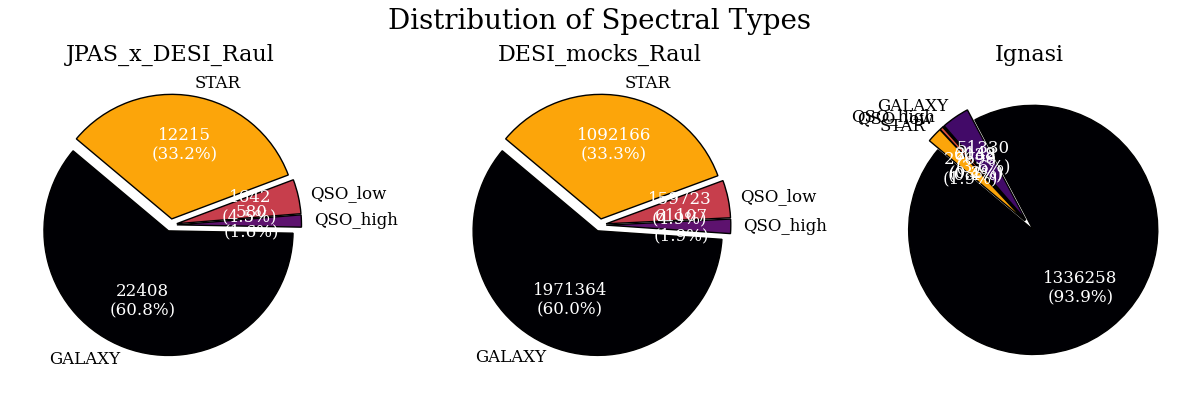

In [9]:
list_datasets = DATA.keys()

fig, axs = plt.subplots(1, len(list_datasets), figsize=(4*len(list_datasets), 4))

for ii, survey_key in enumerate(list_datasets):

    unique_spectype_names, counts = np.unique(DATA[survey_key]["all_pd"]['SPECTYPE'], return_counts=True)

    ratios = counts / np.sum(counts)
    print("ratios:", ratios)
    inverse_ratios = 1.0 / ratios
    class_weights = inverse_ratios / inverse_ratios.mean()
    print("class_weights:", class_weights)

    ax = axs[ii]
    colors = plt.cm.inferno(np.linspace(0., 0.8, len(counts)))
    explode = [0.05] * len(counts)

    # Function to display count and percentage in two lines
    def make_autopct(counts):
        def my_autopct(pct):
            total = sum(counts)
            absolute = int(round(pct * total / 100.0))
            return f"{absolute}\n({pct:.1f}%)"
        return my_autopct

    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=unique_spectype_names,
        autopct=make_autopct(counts),
        startangle=140,
        colors=colors,
        explode=explode,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12}
    )

    # Customize font color inside pie
    for autotext in autotexts:
        autotext.set_color("white")

    ax.set_title(f"{survey_key}", fontsize=16)

# General title
plt.suptitle("Distribution of Spectral Types", fontsize=20)
plt.tight_layout()
plt.show()